# Lab Error Analysis

In [34]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from itertools import islice
import openpyxl

Listing chemicals for analysis

In [35]:
specified_chemicals = ["Chloromethane (methyl chloride)", "Chloroethene (vinyl chloride)", 
    "Bromomethane (methyl bromide)", "Chloroethane (ethyl chloride)",
    "Trichlorofluoromethane", "Diethyl ether", "1,1-Dichloroethene", "Acetone",
    "Iodomethane", "Carbon disulfide", "3-Chloropropene (allyl chloride)",
    "Methylene chloride (DCM)", "trans-1,2-Dichloroethene", "Methyl tert-butyl ether (MTBE)",
    "1,1-Dichloroethane", "2,2-Dichloropropane", "cis-1,2-Dichloroethene", "2-Butanone (MEK)",
    "Methyl acrylate", "Methacrylonitrile", "Bromochloromethane", "Tetrahydrofuran",
    "Trichloromethane (chloroform)", "1,1,1-Trichloroethane", "1-Chlorobutane (butyl chloride)", "Carbon tetrachloride",
    "1,1-Dichloropropene", "Benzene", "1,2-Dichloroethane",
    "Trichloroethene", "1,2-Dichloropropane", "Dibromomethane", "Methyl methacrylate",
    "Bromodichloromethane", "2-Nitropropane", "cis-1,3-Dichloropropene", "4-Methyl-2-pentanone (MIBK)", "Toluene", "trans-1,3-Dichloropropene", "Ethyl methacrylate",
    "1,1,2-Trichloroethane", "Tetrachloroethene", "1,3-Dichloropropane", "2-Hexanone",
    "Dibromochloromethane", "1,2-Dibromoethane (EDB)", "Chlorobenzene",
    "1,1,1,2-Tetrachloroethane", "Ethylbenzene", "m/p-Xylene", "o-Xylene", "Styrene",
    "Bromoform", "Isopropylbenzene (cumene)","Bromobenzene", "1,1,2,2-Tetrachloroethane", "1,2,3-Trichloropropane (TCP)",
    "trans-1,4-Dichloro-2-butene", "n-Propylbenzene", "2-Chlorotoluene", "1,3,5-Trimethylbenzene",
    "4-Chlorotoluene", "tert-Butylbenzene", "Pentachloroethane", "1,2,4-Trimethylbenzene",
    "1-Methylpropylbenzene (sec-butylbenzene)", "1,3-Dichlorobenzene", "4-Isopropyltoluene (p-cymene)", "1,4-Dichlorobenzene", "n-Butylbenzene", "1,2-Dichlorobenzene",
    "Hexachloroethane", "1,2-Dibromo-3-chloropropane (DBCP)", "Nitrobenzene", "1,2,4-Trichlorobenzene",
    "Hexachloro-1,3-butadiene", "Naphthalene", "1,2,3-Trichlorobenzene" 
] 

Defining the chemicals detected

In [36]:
detect_chemicals = ["Bromoform",
"Dibromochloromethane",
"Bromodichloromethane",
"Trichloromethane (chloroform)",
"Tetrahydrofuran",
"2-Butanone (MEK)",
"Carbon disulfide",
"Acetone",
"Chloromethane (methyl chloride)",
"Bromochloromethane",
"Methylene chloride (DCM)",
"Chloroethene (vinyl chloride)",
"Methyl tert-butyl ether (MTBE)",
"Styrene",
"Dibromomethane"
]

# Data Ingestion

In [38]:
#Excel files and only VOCs
raw_data_path = '/Users/lizamclatchy/Documents/GitHub/VOC_Processing_Maui/Paper Resources/Lab_data'
files = os.listdir(raw_data_path)
files_xls = [f for f in files if f.endswith('.xlsx') and 'SVOC' not in f] 

ccv_data = {} 
desired_sheets = ['CCV', 'CCV1', 'CCV2', 'CCV3', 'CCV4'] #We are only using these sheets for error analysis
for file in files_xls:
    file_path = os.path.join(raw_data_path, file)
    xls = pd.ExcelFile(file_path)
    for sheet_name in xls.sheet_names:
        if sheet_name in desired_sheets:
            df = pd.read_excel(file_path, sheet_name=sheet_name)
            ccv_data[f'{file} - {sheet_name}'] = df
dict(islice(ccv_data.items(), 0, 2))

{'231205_VOC.xlsx - CCV':                       Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
 0                            NaN         RT       Area    ICAL Rt  ICAL Area   
 1       Pentafluorobenzene [IS1]       5.43     228338       5.43     235261   
 2      1,4-Difluorobenzene [IS2]       6.17     354508       6.17     402712   
 3         Chlorobenzene-d5 [IS3]       8.91     347493       8.92     387093   
 4   1,4-Dichlorobenzene-d4 [IS4]      10.66     200989      10.67     214027   
 ..                           ...        ...        ...        ...        ...   
 82                           NaN        NaN        NaN        NaN        NaN   
 83                           NaN        NaN        NaN        NaN        NaN   
 84                           NaN        NaN        NaN        NaN        NaN   
 85                           NaN        NaN        NaN        NaN        NaN   
 86                           NaN        NaN        NaN        NaN        NaN   
 
 

# Filter data

In [39]:
filtered_ccv_data = {}
for key, df in ccv_data.items():
    df.columns = df.columns.str.strip()
    if 'Amount' in df.columns and 'Peak Name' in df.columns: #We only want chemical name and amount
        df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce') 
        df['Peak Name'] = df['Peak Name'].str.strip()
        filtered_ccv_data[key] = df[['Amount', 'Peak Name']]
    else:
        print(f"Warning: 'Amount' or 'Peak Name' columns not found in {key}")

In [40]:
for key,df in filtered_ccv_data.items():
  if 'Peak Name' in df.columns:
        filtered_ccv_data[key]['Peak Name'] = filtered_ccv_data[key]['Peak Name'].replace('Methylene chloride', 'Methylene chloride (DCM)')
        filtered_ccv_data[key] = df[df['Peak Name'].isin(specified_chemicals)] #can be specified chemicals
#IF YOU WOULD LIKE TO RUN FOR ALL CHEMS: SWITCH ABOVE TO SPECIFIED_CHEMICALS
#Clean names

/var/folders/ft/rj1gvr1d3q7b_prdsnsxp8y40000gn/T/ipykernel_68604/2581848101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ccv_data[key]['Peak Name'] = filtered_ccv_data[key]['Peak Name'].replace('Methylene chloride', 'Methylene chloride (DCM)')


# Relevant lab information:
Initially it was 8/4 (ketones/others)
Starting from 2023-09-12 the CCV was 18/10 (ketones/others)
Starting from 2024 the CCV was 20/10 (ketones/others)

First group:  230907_VOC,  230908
Second group: 230912 to anything 24 
Last group is anything that starts with 24

Ketones end in "one", there are four:
 Acetone
 2-Butanone (MEK)
 4-Methyl-2-pentanone (MIBK)
 2-Hexanone

## Compare observed and expected values

In [41]:
#I made .csvs for relevant lab information
folder_path = '/Users/lizamclatchy/Documents/GitHub/VOC_Processing_Maui/Paper Resources/Lab_data'
csv_files = os.listdir(folder_path)
def load_csv(csv_filename):
    return pd.read_csv(os.path.join(folder_path, csv_filename))

In [42]:
#Create comparison dictionaries
comparison_results = {}

for key, df_excel in filtered_ccv_data.items():
    file_name = key.split(' - ')[0] 
    
    # Group 1: Files that contain '230907_VOC' or '230907'
    if '230907_VOC' in file_name or '230908_VOC' in file_name:
        csv_filename = 'First_Group_CCV - Sheet1.csv'  
        csv_data = load_csv(csv_filename)
        comparison = pd.merge(df_excel, csv_data, how='left', on=['Peak Name'])
        
        comparison_results[key] = comparison
    
    # Group 2: Files that start with '230912' or files between '23' and '24'
    elif '230912' in file_name or '23' in file_name:
        csv_filename = 'Second_Group_CCV - Sheet1.csv' 
        csv_data = csv_data = load_csv(csv_filename)
        comparison = pd.merge(df_excel, csv_data, how='left', on=['Peak Name'])
       
        comparison_results[key] = comparison
    
    #Group 3: 2024
    elif file_name.startswith('24'):
        csv_filename = 'Third_Group_CCV - Sheet1.csv'  
        csv_data = csv_data = load_csv(csv_filename)
        comparison = pd.merge(df_excel, csv_data, how='left', on=['Peak Name'])
        comparison_results[key] = comparison
dict(islice(comparison_results.items(), 0, 2))

{'231205_VOC.xlsx - CCV':     Amount_x                        Peak Name  Amount_y
 0      5.567  Chloromethane (methyl chloride)        10
 1      5.658    Chloroethene (vinyl chloride)        10
 2      8.166    Bromomethane (methyl bromide)        10
 3      5.965    Chloroethane (ethyl chloride)        10
 4      5.452           Trichlorofluoromethane        10
 ..       ...                              ...       ...
 73     4.811                     Nitrobenzene        10
 74     6.751           1,2,4-Trichlorobenzene        10
 75     7.323         Hexachloro-1,3-butadiene        10
 76     6.310                      Naphthalene        10
 77     6.877           1,2,3-Trichlorobenzene        10
 
 [78 rows x 3 columns],
 '230908_VOC.xlsx - CCV1':     Amount_x                        Peak Name  Amount_y
 0      4.382  Chloromethane (methyl chloride)         4
 1      3.929    Chloroethene (vinyl chloride)         4
 2      4.847    Bromomethane (methyl bromide)         4
 3      4.2

## Perform Error Metrics

In [43]:
all_dfs=[]       
for key,df in comparison_results.items(): #amount_x is observed and amount y is expected
    df['Recovery'] = (df['Amount_x'] / df['Amount_y']) *100
    all_dfs.append(df[['Peak Name', 'Recovery']])
    combined_df = pd.concat(all_dfs)
avg_percent_diff_df = combined_df.groupby('Peak Name', as_index=False).agg(
    avg_percent_diff=('Recovery', 'mean'),
    std_percent_diff=('Recovery', 'std')  
)

avg_percent_diff_df.columns = ['Chemical', 'Mean Recovery', 'Standard Deviation Recovery']
avg_percent_diff_df.head(50)
cols_to_convert = ['Mean Recovery', 'Standard Deviation Recovery']
avg_percent_diff_df[cols_to_convert] = avg_percent_diff_df[cols_to_convert].apply(
    pd.to_numeric, errors='coerce'
)

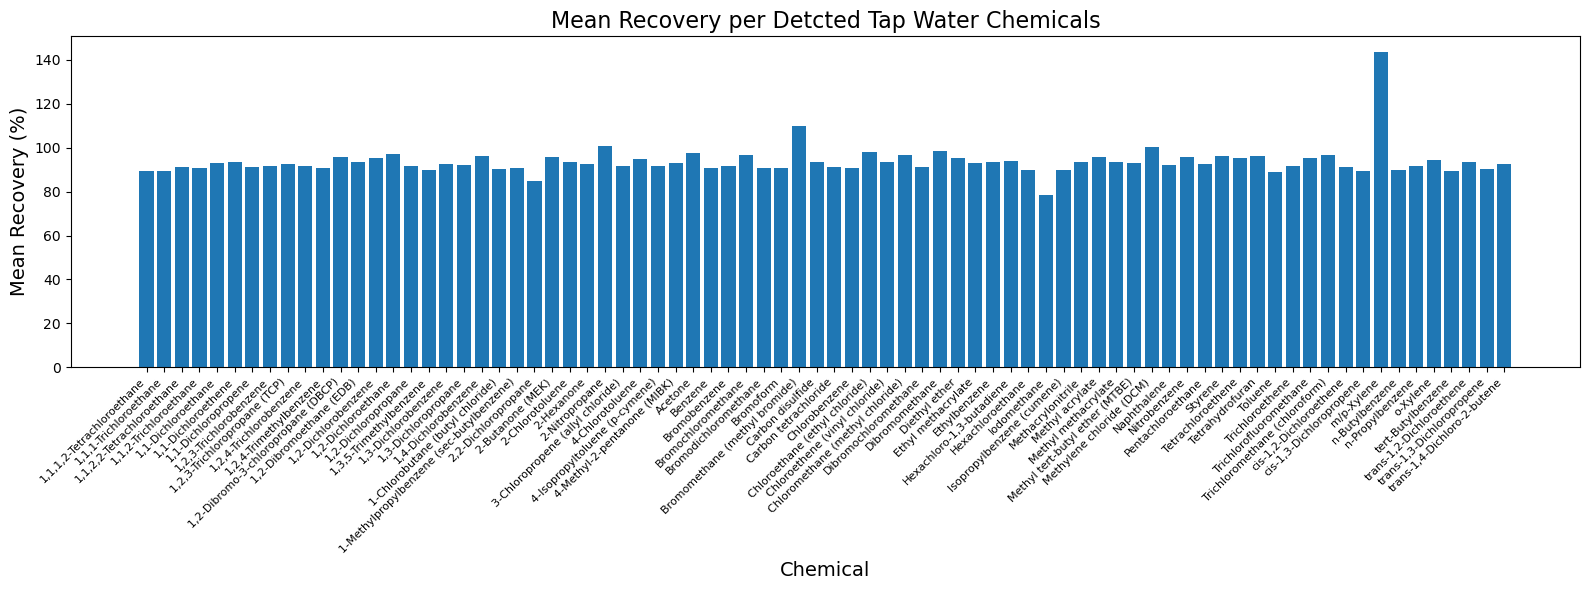

In [44]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.bar(avg_percent_diff_df['Chemical'], avg_percent_diff_df['Mean Recovery'])

plt.title('Mean Recovery per Detcted Tap Water Chemicals', fontsize=16)
plt.xlabel('Chemical', fontsize=14)
plt.ylabel('Mean Recovery (%)', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=8)

plt.tight_layout()
plt.show()

/var/folders/ft/rj1gvr1d3q7b_prdsnsxp8y40000gn/T/ipykernel_68604/3257448059.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_percent_diff_df['Chemical'], rotation=45)


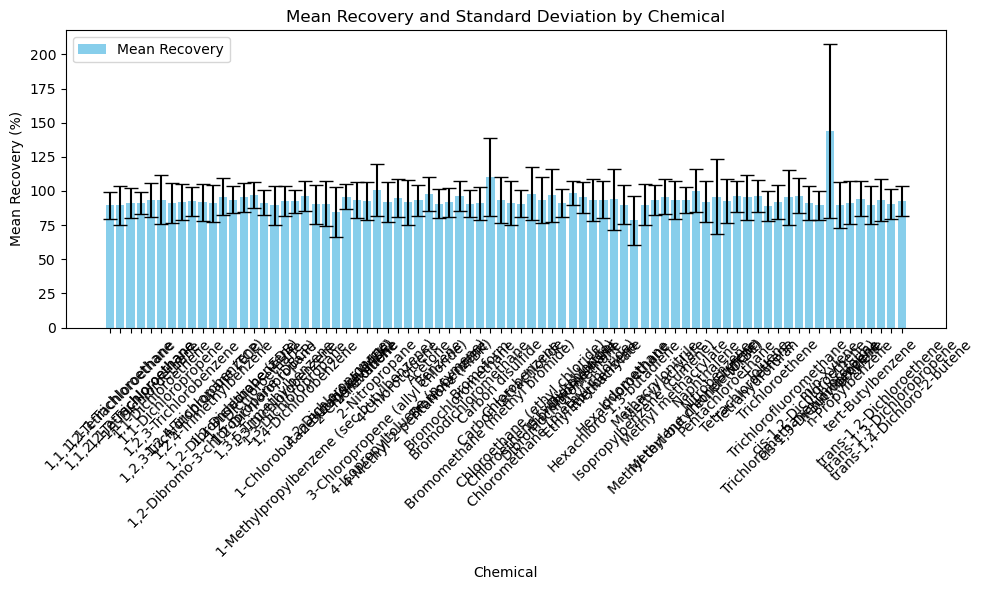

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Average Percent Difference
ax.bar(avg_percent_diff_df['Chemical'], 
       avg_percent_diff_df['Mean Recovery'], 
       yerr=avg_percent_diff_df['Standard Deviation Recovery'], 
       capsize=5, 
       color='skyblue', 
       label='Mean Recovery')

# Customize the plot
ax.set_xlabel('Chemical')
ax.set_ylabel('Mean Recovery (%)')
ax.set_title('Mean Recovery and Standard Deviation by Chemical')
ax.set_xticklabels(avg_percent_diff_df['Chemical'], rotation=45)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()



                       Chemical Mean Recovery Standard Deviation Recovery  \
0     1,1,1,2-Tetrachloroethane          89.5                        10.1   
1         1,1,1-Trichloroethane          89.4                        14.3   
2     1,1,2,2-Tetrachloroethane          91.1                        11.2   
3         1,1,2-Trichloroethane            91                        7.92   
4            1,1-Dichloroethane          93.2                        12.6   
..                          ...           ...                         ...   
73                     o-Xylene          94.4                        12.5   
74            tert-Butylbenzene          89.5                        14.1   
75     trans-1,2-Dichloroethene          93.4                        15.2   
76    trans-1,3-Dichloropropene          90.2                          11   
77  trans-1,4-Dichloro-2-butene          92.6                        11.3   

   RSD (%)  
0     11.3  
1       16  
2     12.3  
3     8.71  
4     13.6

/var/folders/ft/rj1gvr1d3q7b_prdsnsxp8y40000gn/T/ipykernel_68604/1796248350.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


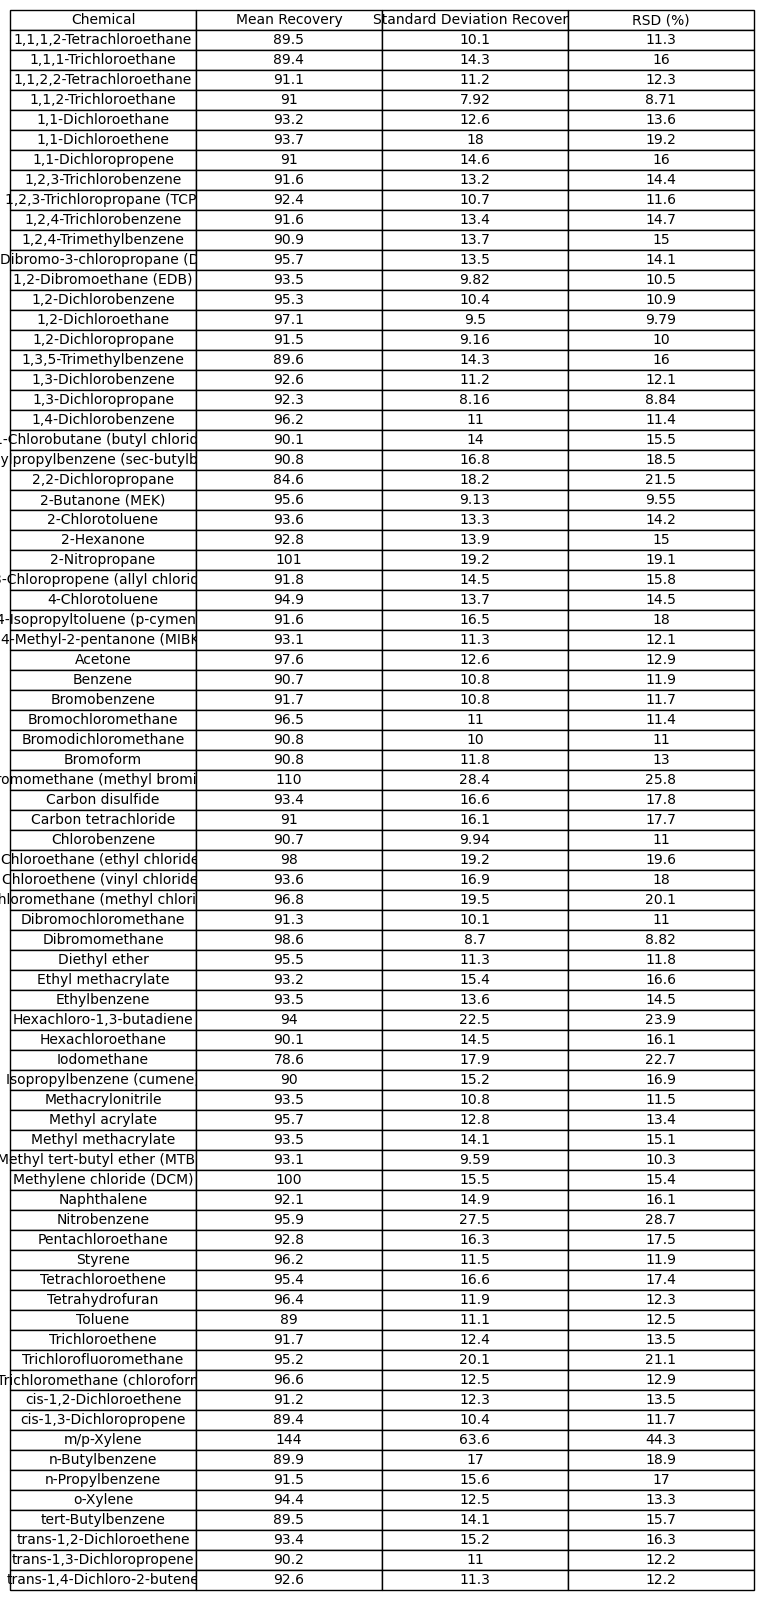

In [46]:
avg_percent_diff_df['RSD (%)'] = (avg_percent_diff_df['Standard Deviation Recovery'] / avg_percent_diff_df['Mean Recovery']) * 100
avg_percent_diff_df['Mean Recovery'] = avg_percent_diff_df['Mean Recovery'].apply(lambda x: f"{x:.3g}")
avg_percent_diff_df['Standard Deviation Recovery'] = avg_percent_diff_df['Standard Deviation Recovery'].apply(lambda x: f"{x:.3g}")
avg_percent_diff_df['RSD (%)'] = avg_percent_diff_df['RSD (%)'].apply(lambda x: f"{x:.3g}")

print(avg_percent_diff_df)
fig, ax = plt.subplots(figsize=(8, 6))

# Hide the axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=avg_percent_diff_df.values, 
                 colLabels=avg_percent_diff_df.columns, 
                 cellLoc='center', 
                 loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Display the plot
plt.tight_layout()
plt.show()


In [47]:
avg_percent_diff_df.to_csv('/Users/lizamclatchy/RAPID_drinkingwater/CSVS/labdataccv.csv')